# Linear Regression

Linear regression is the process of writing the numeric output, called the *dependent variable*, as a function of the input, called the *independent variable*. Our assumption is, data that is to be predicted, is the sum of a deterministic function of the input and a random noise.

$$ r = f(x) + \epsilon $$

where r is the dependent variable, x is the independent variable and $\epsilon$ is the random noise. Using linear regression, our aim is to approximate $f(x)$ by our estimator function.

For linear regression in one dimension, we can write our estimator as follows.

$$ g(x | W_0, W_1) = W_0 + W_1 \cdot x $$

$W_i$ represent the trainable weights, which we will start randomly and change them to fit our data.

Let us begin with generating a random linear data.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Creating a Linear Data

We will add noise to y values so that it is not an exact fit, but rather closer to what we might see in any real data.

In [2]:
def func(x): 
    return 3*x + 5

X = np.random.random(1000) * 50
y = np.array([func(i) for i in X])

### Creating Noise

We will add noise to y values so that it is not an exact fit, but rather closer to what we might see in any real data.

Linear regression does not assume normality on observed variables, but it assumes a 0 mean Gaussian noise on error. Even though your data might not have a normally distributed error, linear regression analysis works well with non-normal errors too. But, the problem is with p-values for hypothesis testing.

As for generating noise, it is easy using numpy. Then we add noise to our y values.

In [3]:
mu, sigma = 0, 10
noise = np.random.normal(mu, sigma, 1000)

y = np.add(y, noise)

Let us show that our data is linear and the noise is Gaussian.

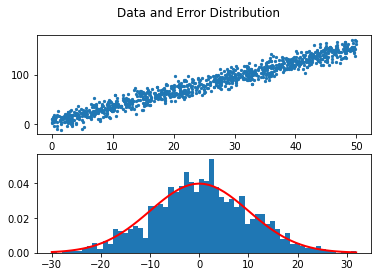

In [15]:
fig, axs = plt.subplots(2)
fig.suptitle('Data and Error Distribution')

axs[0].scatter(X, y, s = 5)

count, bins, ignored = plt.hist(noise, 60, density=True)
axs[1].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

### Generating Training and Validation Sets 

In this tutorial we go with a ratio of 2/3 to 1/3 for training and validation sets respectively. It is important to use floor division so that we do not have an indexing error.

In [7]:
x_tr, y_tr = np.array(X[:len(X)*3//4]), np.array(y[:len(y)*3//4])
x_val, y_val = np.array(X[len(X)*3//4:]), np.array(y[len(y)*3//4:])

print('Training set length: {}\nValidation set length: {}'.format(len(x_tr), len(x_val)))

Training set length: 750
Validation set length: 250


## Model Training

### Random Initialization of Weights

We start by randomly generated weights. It is important to note that these weights will be trained to make our line fit our data better.

In [8]:
w0, w1 = [np.random.random() for _ in range(2)]

Let us see how well our randomly generated line fits our data. In order to show this *fit*, we need to calculate our predictions on using *not yet trained* weights. 

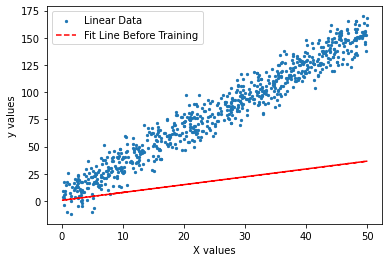

In [9]:
g = w1 * x_tr + w0

plt.scatter(x_tr, y_tr, s = 5, label = 'Linear Data')
plt.plot(x_tr, g, '--r', label = 'Fit Line Before Training')
plt.xlabel('X values')
plt.ylabel('y values')
plt.legend()

### Updating Weights

We have our predictor as

$$ g(x_i|w_0, w_1) = w_0 + w_1 \cdot x_i $$

Taking the derivative of the sum of squared errors with respect to weights, we have two unknown equations.

$$ \sum_i r^i = N\cdot w_0 + w_1 \sum_i x^i $$
$$ \sum_i r^i x^i = w_0 \sum_i x^i + w_1 \sum_i (x^i)^2 $$

This can be written in matrix form as

$$ A \cdot W = y \Longrightarrow W = A^{-1} \cdot y $$ 

where for linear regression

$$ 
A = \begin{bmatrix} N & \sum x_i \\ \sum x_i & \sum x_i^2 \end{bmatrix}, \quad
W = \begin{bmatrix} W_0 \\ W_1 \end{bmatrix}, \quad
y = \begin{bmatrix} \sum y_i \\ \sum y_i \cdot x_i \end{bmatrix}
$$

In [11]:
#Predictions
g = w1 * x_tr + w0

#Update weights
a = np.array([[len(x_tr), sum(x_tr)], 
              [sum(x_tr), sum(np.square(x_tr))]])
A = np.linalg.inv(a)
w0, w1 = np.dot(A, np.array( [sum(y_tr), sum(x_tr * y_tr)] ))

In [12]:
g = w1 * x_tr + w0

### Plotting Our Fit Line and Error

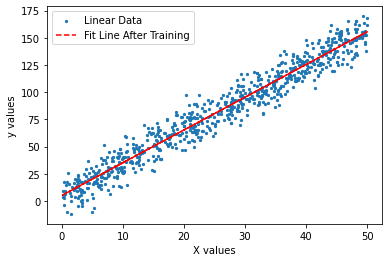

In [13]:
plt.scatter(x_tr, y_tr, label = 'Linear Data', s = 5)
plt.plot(x_tr, g, '--r', label = 'Fit Line After Training')
plt.xlabel('X values')
plt.ylabel('y values')
plt.legend()

### Defining Error

Sum of squared errors is defined as

$$ E_{SSE} = \sum_{i=1}^N [r_i - g(x_i | \theta)]^2 $$

We want to find the $\theta$ that minimizes $E_{SSE}$. This process is called the *Least Squares Estimation*.

We can also write another measure of error, which is relative square error.

$$ E_{RSE} = \frac{\sum_{i=1}^N [r_i - g(x_i | \theta)]^2}{\sum_{i=1}^N (r_i - y)^2} $$

We can write this error as a lambda function.

In [15]:
RSE = lambda y, g: sum(np.square(y - g)) / sum(np.square(y - 1 / len(y)*sum(y)))

We can calculate error on validation set.

In [21]:
pred = lambda x, w0, w1: w1 * x + w0

preds = pred(x_val, w0, w1)

error = RSE(y_val, preds)
print('RSE: {:.4f}'.format(error))

RSE: 0.0491


In [23]:
R_squared = 1 - error
print('R_squared: {:.4f}'.format(R_squared))

R_squared: 0.9509


# Yapılacaklar:

* Validation Set Üzerinde Accuracy Hesabı
* Farklı noise'lar denenecek

$$ R^2 = 1 - E_{RSE} $$

## Using Scikit-Learn for Regression

In [16]:
from sklearn.linear_model import LinearRegression as LR

In [17]:
x_tr = x_tr.reshape(-1, 1)
x_val = x_val.reshape(-1, 1)
reg = LR().fit(x_tr, y_tr)

#Score model
print('Training score: ', reg.score(x_tr, y_tr))
print('Validation score: ', reg.score(x_val, y_val))

#Predict specific value
predict = 30
print('Prediction for {} is: {}'.format(predict, reg.predict(np.array(predict).reshape(-1, 1))))

Training score:  0.9503542059546477
Validation score:  0.9553747713724686
Prediction for 30 is: [95.38003653]


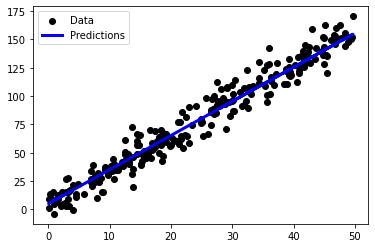

In [18]:
preds = reg.predict(x_val)

plt.scatter(x_val, y_val, color="black", label = 'Data')
plt.plot(x_val, preds, color="blue", linewidth=3, label = 'Predictions')
plt.legend()

## References

* Ethem Alpaydin. 2010. Introduction to Machine Learning (2nd. ed.). The MIT Press.
* https://data.library.virginia.edu/normality-assumption/